# Sect2. Linear Regression

>TensorFlow Mechanics
- Build graph using TF operations
- Run graph and get results
- Update graph and get results

### Ex1. Variable 사용
> $$H(x) = Wx+b$$


> x, y 값이 주어졌을 때, W, b 값을 예측하기

- 그래프 빌드
- 세션을 통해 그래프를 실행
- 실행결과가 그래프를 업데이트

In [2]:
from tqdm.notebook import tqdm
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# import tensorflow as tf
# from tqdm import tqdm_notebook

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# TF 변수 선언 (1차원 랜던숫자)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [4]:
# Fit the line
# for step in tqdm_notebook(range(2001)):
for step in tqdm(range(2001)):
    sess.run(train)
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val},  \t W={W_val},  \t b={b_val}".format(
            step=step, 
            cost_val=sess.run(cost), 
            W_val=sess.run(W), 
            b_val=sess.run(b)
        ));

  0%|          | 0/2001 [00:00<?, ?it/s]

step=0, 	 cost=0.5095532536506653,  	 W=[0.13181786],  	 b=[1.8203863]
step=1, 	 cost=0.5027849078178406,  	 W=[0.14003274],  	 b=[1.8187058]
step=2, 	 cost=0.4969545900821686,  	 W=[0.14754811],  	 b=[1.8167304]
step=3, 	 cost=0.4918682873249054,  	 W=[0.15444107],  	 b=[1.8144939]
step=4, 	 cost=0.4873720705509186,  	 W=[0.16078015],  	 b=[1.8120264]
step=200, 	 cost=0.18651311099529266,  	 W=[0.49840796],  	 b=[1.1402366]
step=400, 	 cost=0.07121986150741577,  	 W=[0.6900465],  	 b=[0.70459706]
step=600, 	 cost=0.02719523012638092,  	 W=[0.80846757],  	 b=[0.4353982]
step=800, 	 cost=0.010384471155703068,  	 W=[0.8816446],  	 b=[0.26904958]
step=1000, 	 cost=0.003965296316891909,  	 W=[0.9268636],  	 b=[0.16625628]
step=1200, 	 cost=0.0015141427284106612,  	 W=[0.9548062],  	 b=[0.10273617]
step=1400, 	 cost=0.0005781747750006616,  	 W=[0.97207296],  	 b=[0.06348473]
step=1600, 	 cost=0.000220772999455221,  	 W=[0.98274285],  	 b=[0.03922959]
step=1800, 	 cost=8.430322486674413e-05,

### Ex2. Plaeholder 사용
> 데이터의 형태만 지정하고 실제 데이터는 실행단계에서 입력받는 방법

- 그래프 빌드
- 세션을 통해 그래프를 실행
- 실행결과가 그래프를 업데이트

In [5]:
# import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [6]:
# Fit the line
steps     = []
cost_vals = []
W_vals    = []
b_vals    = []
for step in tqdm(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: [1, 2, 3], 
                                                    Y: [1, 2, 3]})
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    # W_vals.append(float(W_val))
    # b_vals.append(float(b_val))
    
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

  0%|          | 0/2001 [00:00<?, ?it/s]

step=0, 	 cost=1.6063300371170044, 	 W=[0.37969735], 	 b=[0.2314125]
step=1, 	 cost=1.2749871015548706, 	 W=[0.42833576], 	 b=[0.25159636]
step=2, 	 cost=1.0130529403686523, 	 W=[0.47162724], 	 b=[0.269431]
step=3, 	 cost=0.8059826493263245, 	 W=[0.5101648], 	 b=[0.2851773]
step=4, 	 cost=0.6422796845436096, 	 W=[0.5444757], 	 b=[0.29906714]
step=200, 	 cost=0.009826485998928547, 	 W=[0.885145], 	 b=[0.26109245]
step=400, 	 cost=0.0037522416096180677, 	 W=[0.9290264], 	 b=[0.16133933]
step=600, 	 cost=0.0014327882090583444, 	 W=[0.9561427], 	 b=[0.09969788]
step=800, 	 cost=0.000547106668818742, 	 W=[0.97289896], 	 b=[0.06160705]
step=1000, 	 cost=0.00020891004533041269, 	 W=[0.9832533], 	 b=[0.03806928]
step=1200, 	 cost=7.977206405485049e-05, 	 W=[0.9896515], 	 b=[0.02352449]
step=1400, 	 cost=3.045985067728907e-05, 	 W=[0.9936053], 	 b=[0.01453657]
step=1600, 	 cost=1.1631370398390573e-05, 	 W=[0.9960485], 	 b=[0.00898272]
step=1800, 	 cost=4.4413404793886e-06, 	 W=[0.99755824], 	 b

In [7]:
W_val, W_val[0], type(W_val[0])

(array([0.99849105], dtype=float32), 0.99849105, numpy.float32)

In [8]:
# cost_vals, b_val
type(b_val), str(b_val), float(b_val)

(numpy.ndarray, '[0.00343009]', 0.0034300920087844133)

### Ex3. Plaeholder 사용
> exptected : W=1, b=1.1

- X: [1.0, 2.0, 3.0, 4.0, 5.0]
- Y: [2.1, 3.1, 4.1, 5.1, 6.1]

In [9]:
# Fit the line
# for step in notebook_tqdm(range(2001)):
for step in tqdm(range(2001)):

    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
        feed_dict={X: [1.0, 2.0, 3.0, 4.0, 5.0], 
                   Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0 or step < 10:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val},  \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));
        

  0%|          | 0/2001 [00:00<?, ?it/s]

step=0, 	 cost=1.2124183177947998, 	 W=[1.0646172],  	 b=[0.02545203]
step=1, 	 cost=0.7839767932891846, 	 W=[1.1148742],  	 b=[0.04306595]
step=2, 	 cost=0.5337793827056885, 	 W=[1.153018],  	 b=[0.05731218]
step=3, 	 cost=0.38745734095573425, 	 W=[1.1819153],  	 b=[0.06898485]
step=4, 	 cost=0.3016725182533264, 	 W=[1.2037548],  	 b=[0.07869023]
step=5, 	 cost=0.25116923451423645, 	 W=[1.2202073],  	 b=[0.08689114]
step=6, 	 cost=0.2212294340133667, 	 W=[1.2325482],  	 b=[0.09394087]
step=7, 	 cost=0.20327672362327576, 	 W=[1.2417512],  	 b=[0.10010916]
step=8, 	 cost=0.19231288135051727, 	 W=[1.2485594],  	 b=[0.10560191]
step=9, 	 cost=0.18542511761188507, 	 W=[1.2535402],  	 b=[0.11057631]
step=100, 	 cost=0.09582629054784775, 	 W=[1.2002947],  	 b=[0.37687236]
step=200, 	 cost=0.048676617443561554, 	 W=[1.1427537],  	 b=[0.58461374]
step=300, 	 cost=0.024726109579205513, 	 W=[1.1017432],  	 b=[0.7326749]
step=400, 	 cost=0.012560045346617699, 	 W=[1.072514],  	 b=[0.8382007]
step

### Ex4. Linear Regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf

number_of_points = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(number_of_points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b +np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

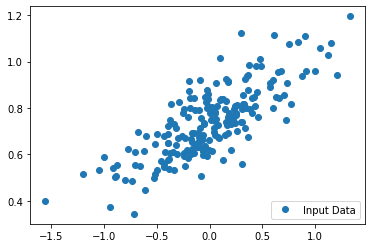

In [11]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [12]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

# Computes the mean of elements across dimensions of a tensor
cost_function = tf.reduce_mean(tf.square(y - y_point))

# Optimizer that implements the gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# Add operations to minimize cost_function
train = optimizer.minimize(cost_function)

# Returns an Op that initializes global variables
# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()

  0%|          | 0/2001 [00:00<?, ?it/s]


 y = [-0.39534414] x + [0.74240255] 


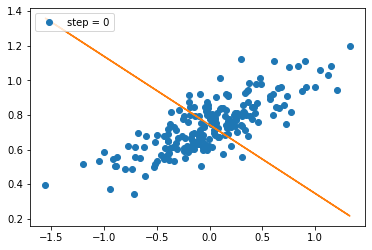


 y = [-0.2547418] x + [0.74180627] 


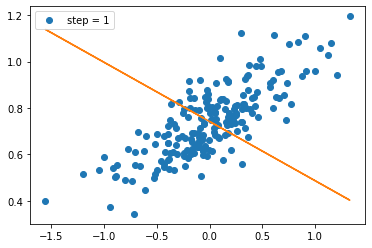


 y = [-0.14437258] x + [0.74134606] 


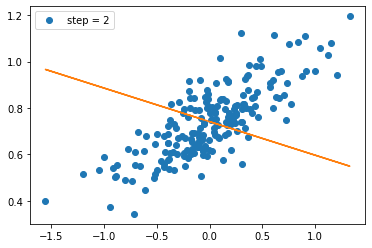


 y = [-0.05773564] x + [0.74098486] 


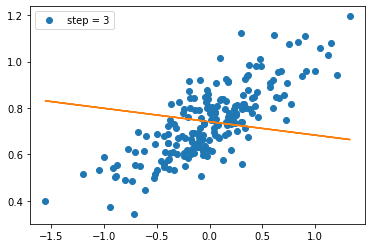


 y = [0.0102721] x + [0.7407013] 


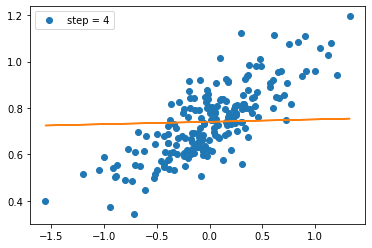


 y = [0.25854102] x + [0.73966616] 


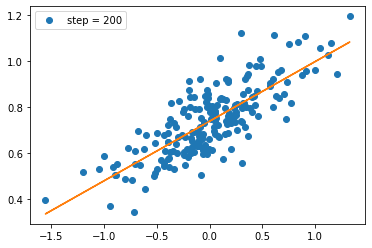


 y = [0.25854102] x + [0.73966616] 


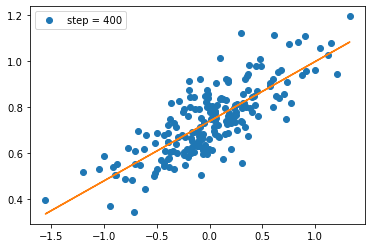


 y = [0.25854102] x + [0.73966616] 


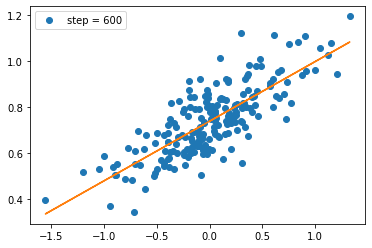


 y = [0.25854102] x + [0.73966616] 


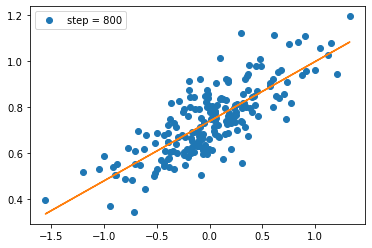


 y = [0.25854102] x + [0.73966616] 


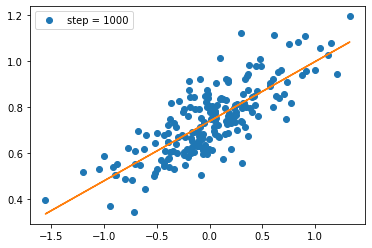


 y = [0.25854102] x + [0.73966616] 


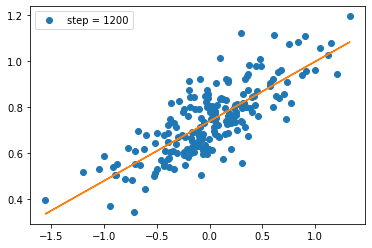


 y = [0.25854102] x + [0.73966616] 


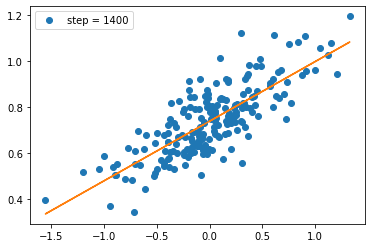


 y = [0.25854102] x + [0.73966616] 


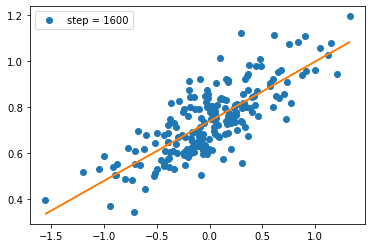


 y = [0.25854102] x + [0.73966616] 


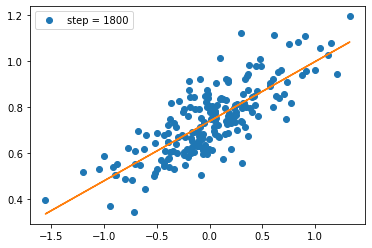


 y = [0.25854102] x + [0.73966616] 


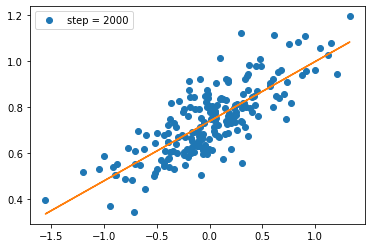

In [13]:
with tf.Session() as sess:
    sess.run(model)
    for step in tqdm(range(0,2001)):
        sess.run(train)
        if (step % 200) == 0 or step<5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend(loc=2)
            plt.show()